In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [86]:
def _fitness(x):
    #x = np.array(x)
    if x > -11 and x < 11:
        y = (x**2+x)*np.cos(2*x) + x**2
        return round(y, 6)
    else:
        return 0

fitness = np.vectorize(_fitness)

In [87]:
x = np.linspace(start = -20, stop = 20, num = 200)

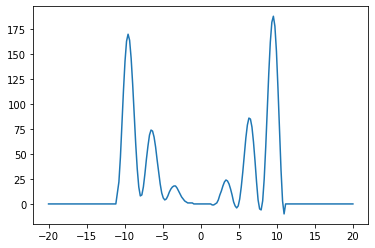

In [88]:
plt.plot(x, fitness(x))

In [89]:
def mutate(parents, fitness_function):
    n = int(len(parents))
    scores = fitness_function(parents)
    idx = scores > 0 ## positive values only
    scores = scores[idx]
    parents = np.array(parents)[idx]
    ## resample parents with probabilities proportional to fitness
    ## then, add some noise for 'random' mutation
    children = np.random.choice(parents, size=n, p = scores / scores.sum()) 
    children = children + np.random.uniform(-0.51,0.51, size=n)  # add some noise to mutate
    return children.tolist() ## convert array to list


In [90]:
def _get_fittest_parent(parents, fitness):
    _fitness = fitness(parents)
    PFitness = list(zip(parents, _fitness))
    PFitness.sort(key = lambda x: x[1], reverse=True)
    best_parent, best_fitness = PFitness[0]
    return round(best_parent, 4), round(best_fitness, 4)

In [97]:
def GA(parents, fitness_function, popsize = 100, max_iter = 200):
    History = []
    ## initial parents; gen zero
    best_parent, best_fitness = _get_fittest_parent(parents, fitness) # extract fittest individual
    print('generation {}| best fitness {}| current fitness {} | current_parent {}'.format(0, best_fitness, best_fitness, best_parent))
    
    # first plot the initial parents
    x = np.linspace(start=-20, stop=20, num=200) ## population range
    plt.plot(x, fitness_function(x))
    plt.scatter(parents, fitness_function(parents), marker= 'x')    
    
    ## for each next generation
    for i in range(1, max_iter):
        parents = mutate(parents, fitness_function=fitness_function)
        
        curr_parent, curr_fitness = _get_fittest_parent(parents, fitness_function) # extract fittest individual
    
        # update best fitness values
        if curr_fitness > best_fitness:
            best_fitness = curr_fitness 
            best_parent = curr_parent 
            
        curr_parent, curr_fitness = _get_fittest_parent(parents, fitness_function)
        if i % 10 == 0:
            print('generation {}| best fitness {}| current fitness {} | current_parent {}'.format(i, best_fitness, curr_fitness, curr_parent))
        History.append((i, np.max(fitness_function(parents)))) # save generation MAX fitness   
    
    plt.scatter(parents, fitness_function(parents))
    plt.scatter(best_parent, fitness_function(best_parent), marker = '.', c = 'b', s = 200)
    plt.pause(0.09)
    plt.ioff()
    ## return best parents
    print('generation {}| best fitness {}| best_parent {}'.format(i, best_fitness, best_parent))
        
    return best_parent, best_fitness, History


In [98]:
x = np.linspace(start=-20, stop=20, num=200)
init_pop = np.random.uniform(low=-20, high=20, size=20)

generation 0| best fitness 183.903| current fitness 183.903 | current_parent 9.3622
generation 10| best fitness 188.9693| current fitness 188.9197 | current_parent 9.5061
generation 20| best fitness 188.9706| current fitness 188.9697 | current_parent 9.5195
generation 30| best fitness 188.9706| current fitness 188.691 | current_parent 9.5591
generation 40| best fitness 188.9706| current fitness 188.8899 | current_parent 9.542
generation 50| best fitness 188.9707| current fitness 188.9108 | current_parent 9.5047
generation 60| best fitness 188.9707| current fitness 188.948 | current_parent 9.5113
generation 70| best fitness 188.9707| current fitness 188.1588 | current_parent 9.4585
generation 80| best fitness 188.9709| current fitness 188.7383 | current_parent 9.488
generation 90| best fitness 188.9709| current fitness 188.7602 | current_parent 9.5542
generation 100| best fitness 188.9709| current fitness 188.8562 | current_parent 9.4982
generation 110| best fitness 188.9709| current fi

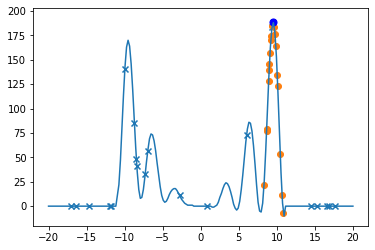

generation 199| best fitness 188.9709| best_parent 9.5225


In [99]:
parent_, fitness_, history = GA(init_pop, fitness)

Text(0, 0.5, 'Fitness')

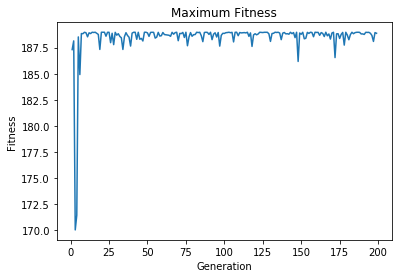

In [101]:
x, y = list(zip(*history))
plt.plot(x, y)
plt.title('Maximum Fitness')
plt.xlabel("Generation")
plt.ylabel("Fitness")